In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from polyglot.detect import Detector
from polyglot.text import Text
from utils import get_config
from sqlalchemy import create_engine
from textblob import TextBlob as tb
from textblob_fr import PatternTagger, PatternAnalyzer

In [27]:
def detect_lang(text):
  try:
    detect = Detector(text)
    return detect.language.code
  except Exception:
    return None

def get_polarity(text):
  lang = detect_lang(text)
  text_analysed = Text(text, hint_language_code=lang)
  try:
    return text_analysed.polarity
  except Exception:
    return None

def get_subjectivity(text):
  lang = detect_lang(text)
  blob = tb(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
  if lang == "en":
    try:
      return tb(text).sentiment.subjectivity
    except Exception:
      return None
  elif lang == "fr":
    try:
      return blob.sentiment[1]
    except Exception:
      return None
  else:
    return None

def get_eligibility(x):
  return "eligible" if x==1 else "non-eligible"
      
def get_analysis(score):
  if score < 0:
    return "Negatif"
  elif score == 0:
    return "Neutre"
  else:
    return "Positif"
  
def get_analysis2(score):
  if score <= 0.5:
    return "Objectif"
  elif score > 0.5:
    return "Subjectif"
  else:
    return None

In [17]:
engine = create_engine(get_config('mysql'))

In [18]:
df = pd.read_sql("Select * from Result;", engine)

In [25]:
df = df.dropna()
df

,username,course_id,grade,eligibility
16,__Baptiste__,course-v1:MinesTelecom+04026+session02,0.00,0.0
17,__Eric,MinesTelecom/04017/session01,0.98,0.0
18,__florent__,course-v1:MinesTelecom+04017+session04,0.00,0.0
19,__frederic__,course-v1:MinesTelecom+04017+session03,0.00,0.0
20,__frederic__,course-v1:MinesTelecom+04017+session04,0.00,0.0
...,...,...,...,...
113168,ZZOHRA,MinesTelecom/04021S02/session02,0.00,0.0
113169,Zzyzx,MinesTelecom/04017S02/session02,0.00,0.0
113170,Zzyzx,MinesTelecom/04018S02/session02,0.00,0.0
113171,ZzZiiiOoO,MinesTelecom/04018/session01,0.00,0.0


<AxesSubplot: xlabel='grade', ylabel='Count'>

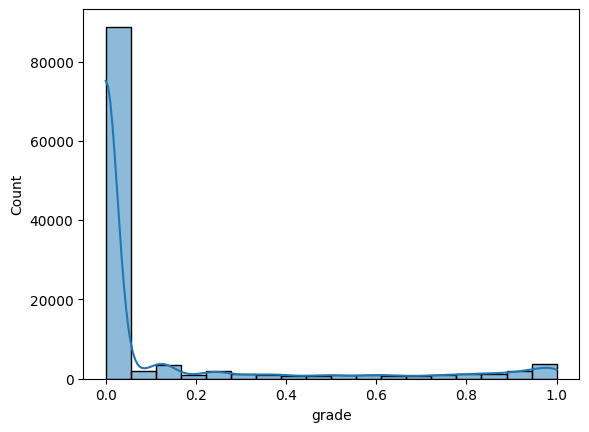

In [20]:
sns.histplot(df['grade'], kde=True)

In [28]:
df['eligibility'] = df['eligibility'].apply(get_eligibility)

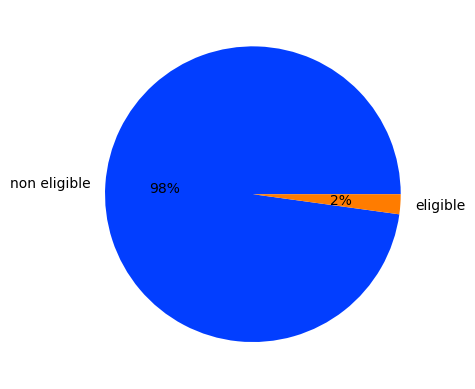

In [29]:
color = sns.color_palette('bright')
plt.pie(df['eligibility'].value_counts(),labels=['non eligible', 'eligible'], colors=color, autopct='%.0f%%')
plt.show()